In [110]:
import pickle
import numpy as np
import matplotlib.pyplot as plt
import cv2
from shapely.geometry import Polygon
import networkx as nx

In [61]:
with open('/home/alishakhan/notebooks/CubiCasa5k/data/test_modified_1.pkl', 'rb') as f:
    test = pickle.load(f)

with open('/home/alishakhan/notebooks/CubiCasa5k/data/val_modified_1.pkl', 'rb') as f:
    val = pickle.load(f)

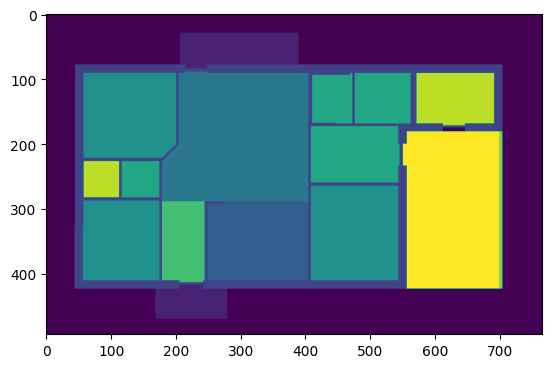

In [62]:
#no undefined values
set(val[4].flatten())
plt.imshow(val[4])

In [63]:
%matplotlib inline
from skimage import transform
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import torch
import torch.nn.functional as F
from torch.utils.data import DataLoader
from floortrans.models import get_model
from floortrans.loaders import FloorplanSVG, DictToTensor, Compose, RotateNTurns
from floortrans.plotting import segmentation_plot, polygons_to_image, draw_junction_from_dict, discrete_cmap
#discrete_cmap()
from floortrans.post_prosessing import split_prediction, get_polygons, split_validation
from mpl_toolkits.axes_grid1 import AxesGrid

rot = RotateNTurns() #
room_classes = ["Background", "Outdoor", "Wall", "Kitchen", "Living Room" ,"Bed Room", "Bath", "Entry", "Railing", "Storage", "Garage", "Undefined"]
icon_classes = ["No Icon", "Window", "Door", "Closet", "Electrical Applience" ,"Toilet", "Sink", "Sauna Bench", "Fire Place", "Bathtub", "Chimney"]
room_classes.append("Door")
data_folder = 'data/cubicasa5k/'
data_file = 'test.txt'
normal_set = FloorplanSVG(data_folder, data_file, format='txt', original_size=True)
data_loader = DataLoader(normal_set, batch_size=1, num_workers=0)
data_iter = iter(data_loader)
# Setup Model
model = get_model('hg_furukawa_original', 51)

n_classes = 44
split = [21, 12, 11]
#model.conv4_ = torch.nn.Conv2d(256, n_classes, bias=True, kernel_size=1)
#model.upsample = torch.nn.ConvTranspose2d(n_classes, n_classes, kernel_size=4, stride=4)
#checkpoint = torch.load('model_best_val_loss_var.pkl')

#model.load_state_dict(checkpoint['model_state'])
#model.eval()
#model.cuda()
print("Model loaded.")

Model loaded.


In [64]:
normal_set[0].keys()

dict_keys(['image', 'label', 'folder', 'heatmaps', 'scale'])

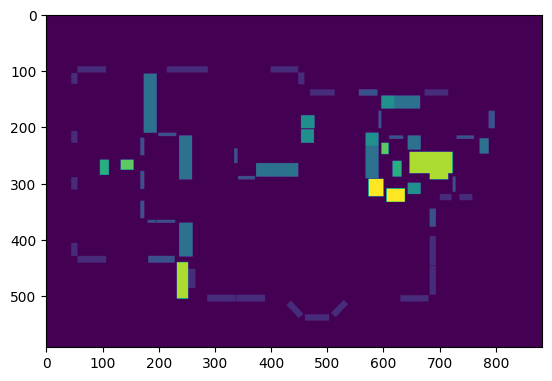

In [65]:
#icons
plt.imshow(normal_set[0]['label'][1])
icons=normal_set[0]['label'][1].numpy()

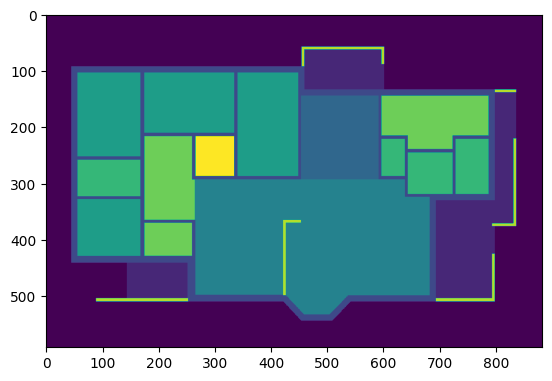

In [66]:
#no undefined values
plt.imshow(test[0])
floorplan=test[0]

In [67]:
set(test[0].flatten())

{0, 1, 2, 3, 4, 5, 6, 7, 8, 9}

In [68]:
#which integer doors are

In [69]:
icon_classes[2]

'Door'

In [70]:
icons

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]], dtype=float32)

In [71]:
floorplan.shape==icons.shape

True

In [72]:
#use np.where, returns rows and columns
#add new class to original class
# add class for door, room_classes[12]=door
#find ro
rows,column=np.where(icons==2)

In [73]:
floorplan[rows,column]=12

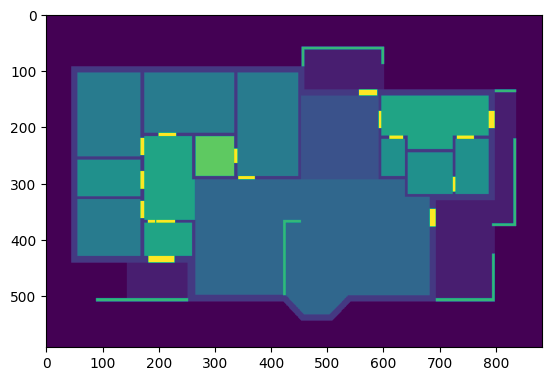

In [74]:
#now we can see where doors are
plt.imshow(floorplan)

In [75]:
def isolate_class(rooms, CLASS: int):
    template = np.zeros_like(rooms)
    rows, cols = np.where(rooms == CLASS)
    template[rows, cols] = 1
    return template

In [88]:
bad=[0, 1, 2, 8, 11]
good=[3,4,5,6,7,9,10,12]

def vis_nodes(img, significant_nodes):
    #signficant nodes exclude rooms we don't care about
    nodes = {}
    room_contours={}
    #door_contours={}
    for c in significant_nodes:
        nodes[c] = []
        room_contours[c] = []
        t = isolate_class(img, c)
        contours, _ = cv2.findContours(t.astype(np.uint8), mode=cv2.RETR_EXTERNAL, method=cv2.CHAIN_APPROX_NONE)
        for s in contours:
            room_contours[c].append(s)
            nodes[c].append(np.squeeze(np.array(s), 1).mean(0))
    template = img.copy()
    plt.figure(figsize=(10, 10))
    plt.imshow(template)
    for n in nodes.keys():
        for p in nodes[n]:
            plt.text(p[0], p[1], f"{room_classes[n]}")
            plt.scatter(p[0], p[1], alpha=0.6)
    plt.show()
    return(room_contours, room_contours[12], nodes) #room contours, door contours

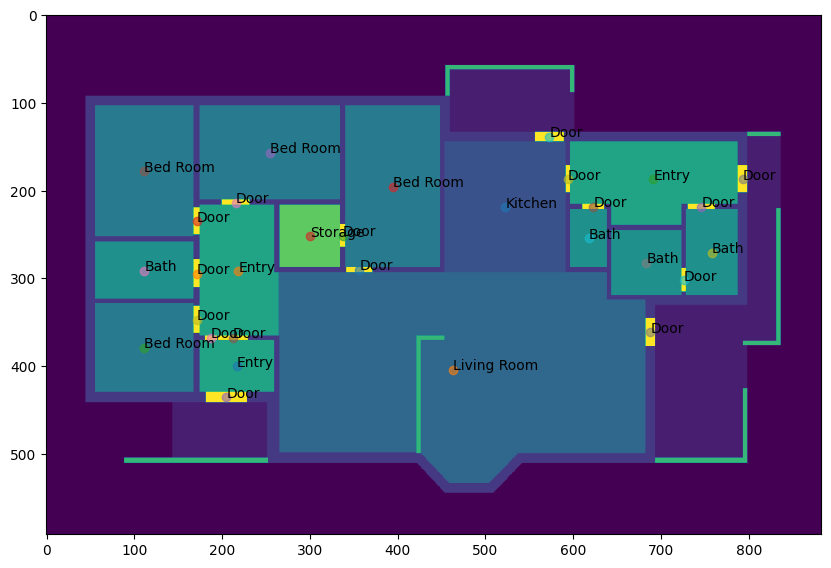

In [89]:
rooms, doors, nodes=vis_nodes(floorplan, good)

rc = []
for k in rooms.keys():
    if k != 12:
        rc += rooms[k]

{3: [array([[[454, 145]],
  
         [[454, 146]],
  
         [[454, 147]],
  
         ...,
  
         [[457, 145]],
  
         [[456, 145]],
  
         [[455, 145]]], dtype=int32)],
 4: [array([[[265, 294]],
  
         [[265, 295]],
  
         [[265, 296]],
  
         ...,
  
         [[268, 294]],
  
         [[267, 294]],
  
         [[266, 294]]], dtype=int32)],
 5: [array([[[ 56, 329]],
  
         [[ 56, 330]],
  
         [[ 56, 331]],
  
         [[ 56, 332]],
  
         [[ 56, 333]],
  
         [[ 56, 334]],
  
         [[ 56, 335]],
  
         [[ 56, 336]],
  
         [[ 56, 337]],
  
         [[ 56, 338]],
  
         [[ 56, 339]],
  
         [[ 56, 340]],
  
         [[ 56, 341]],
  
         [[ 56, 342]],
  
         [[ 56, 343]],
  
         [[ 56, 344]],
  
         [[ 56, 345]],
  
         [[ 56, 346]],
  
         [[ 56, 347]],
  
         [[ 56, 348]],
  
         [[ 56, 349]],
  
         [[ 56, 350]],
  
         [[ 56, 351]],
  
         [[ 56, 352]]

In [105]:
len(rooms[5])
nodes_lst=[]
for k in rooms.keys():
    if k!=12:
        nodes_lst+=([k]*len(rooms[k]))
nodes_lst

[3, 4, 5, 5, 5, 5, 6, 6, 6, 6, 7, 7, 7, 9]

In [127]:
rooms[k]

[array([[[454, 145]],
 
        [[454, 146]],
 
        [[454, 147]],
 
        ...,
 
        [[457, 145]],
 
        [[456, 145]],
 
        [[455, 145]]], dtype=int32)]

In [131]:
len(rooms[5])
positions=[]
for k in rooms.keys():
    if k!=12:
        for cont in rooms[k]:
            positions.append(np.array(cont).squeeze(1).mean(0).tolist())
positions




[[522.5, 219.0],
 [463.5602294455067, 404.1586998087954],
 [111.5, 379.0],
 [394.5, 195.5],
 [254.5, 157.0],
 [111.5, 178.0],
 [111.5, 291.0],
 [683.5, 282.5],
 [758.0, 270.5],
 [617.5, 254.5],
 [217.0, 400.0],
 [218.60253699788584, 291.80761099365753],
 [691.309187279152, 187.21201413427562],
 [300.0, 252.0]]

In [132]:
node_attrs = {}

for i, n in enumerate(nodes_lst):
    node_attrs[i] = room_classes[n]

In [135]:
pos_attrs = {}

for i, n in enumerate(positions):
    pos_attrs[i] = [n[0], -n[1]]

In [86]:
def get_edges(img, room_contours, door_contours):
    connections_int = []
    connections_vis = []
    nodes={}
    for i, room1 in enumerate(room_contours):
        room1_arr = np.array(room1).squeeze(1) 
        room1_ply = Polygon(room1_arr).buffer(1)
        for j, room2 in enumerate(room_contours):
            room2_arr = np.array(room2).squeeze(1)
            room2_ply = Polygon(room2_arr).buffer(1)
            if i != j:
                if room1_ply.intersects(room2_ply):
                    connections_int.append([i, j])
                    connections_vis.append([
                        room1_arr.mean(0),
                        room2_arr.mean(0)
                    ])
                else:
                    for door in door_contours:
                        door = Polygon(np.array(door).squeeze(1)).buffer(1)
                        if (room1_ply.intersects(door) and room2_ply.intersects(door)):
                            connections_int.append([i, j])
                            connections_vis.append([
                                room1_arr.mean(0),
                                room2_arr.mean(0)
                            ])
    return connections_int, connections_vis

In [90]:
idx, vis=get_edges(floorplan, rc, doors)

In [96]:
idx #0 doesn't mean room_classes[0]
rc

[array([[[454, 145]],
 
        [[454, 146]],
 
        [[454, 147]],
 
        ...,
 
        [[457, 145]],
 
        [[456, 145]],
 
        [[455, 145]]], dtype=int32),
 array([[[265, 294]],
 
        [[265, 295]],
 
        [[265, 296]],
 
        ...,
 
        [[268, 294]],
 
        [[267, 294]],
 
        [[266, 294]]], dtype=int32),
 array([[[ 56, 329]],
 
        [[ 56, 330]],
 
        [[ 56, 331]],
 
        [[ 56, 332]],
 
        [[ 56, 333]],
 
        [[ 56, 334]],
 
        [[ 56, 335]],
 
        [[ 56, 336]],
 
        [[ 56, 337]],
 
        [[ 56, 338]],
 
        [[ 56, 339]],
 
        [[ 56, 340]],
 
        [[ 56, 341]],
 
        [[ 56, 342]],
 
        [[ 56, 343]],
 
        [[ 56, 344]],
 
        [[ 56, 345]],
 
        [[ 56, 346]],
 
        [[ 56, 347]],
 
        [[ 56, 348]],
 
        [[ 56, 349]],
 
        [[ 56, 350]],
 
        [[ 56, 351]],
 
        [[ 56, 352]],
 
        [[ 56, 353]],
 
        [[ 56, 354]],
 
        [[ 56, 355]],
 
        

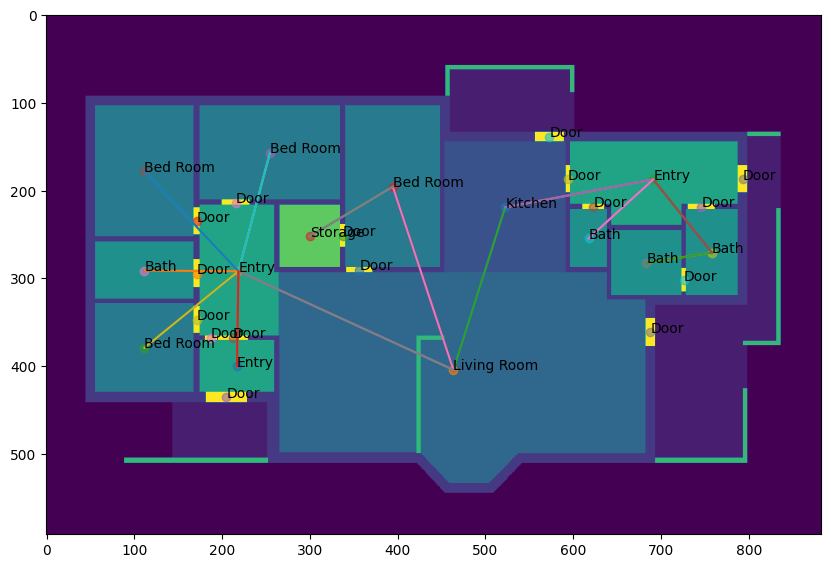

In [92]:
plt.figure(figsize=(10, 10))
plt.imshow(floorplan)
for n in nodes.keys():
    for p in nodes[n]:
        plt.text(p[0], p[1], f"{room_classes[n]}")
        plt.scatter(p[0], p[1], alpha=0.6)
for pt1, pt2 in vis:
    plt.plot([pt1[0],pt2[0]],[pt1[1], pt2[1]])
    
plt.show()

In [106]:
idx

[[0, 1],
 [0, 12],
 [1, 0],
 [1, 3],
 [1, 11],
 [2, 11],
 [3, 1],
 [3, 13],
 [4, 11],
 [5, 11],
 [6, 11],
 [7, 8],
 [8, 7],
 [8, 12],
 [9, 12],
 [10, 11],
 [10, 11],
 [11, 1],
 [11, 2],
 [11, 4],
 [11, 5],
 [11, 6],
 [11, 10],
 [11, 10],
 [12, 0],
 [12, 8],
 [12, 9],
 [13, 3]]

[[0 1 1 0 0 0 0 0 0 0 0 0 0 0]
 [1 0 0 1 1 0 0 0 0 0 0 0 0 0]
 [1 0 0 0 0 0 0 0 0 0 0 1 1 0]
 [0 1 0 0 0 0 1 0 0 0 0 0 0 0]
 [0 1 0 0 0 1 0 1 1 1 0 0 0 1]
 [0 0 0 0 1 0 0 0 0 0 0 0 0 0]
 [0 0 0 1 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 1 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 1 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 1 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 1 0 0]
 [0 0 1 0 0 0 0 0 0 0 1 0 0 0]
 [0 0 1 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 1 0 0 0 0 0 0 0 0 0]]


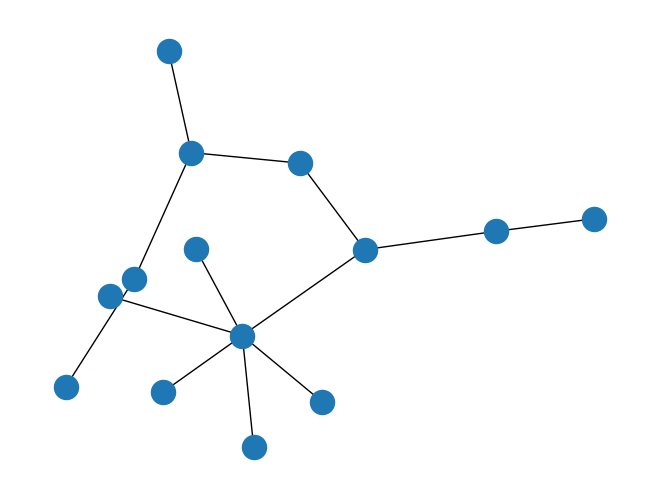

In [166]:
G=nx.Graph(idx)
nx.draw(G)
A=nx.adjacency_matrix(G).todense()
print(A)

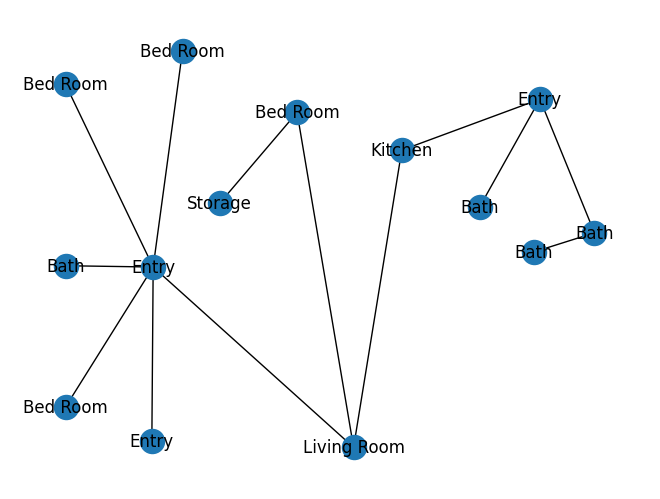

In [136]:
nx.draw(G, labels=node_attrs, pos=pos_attrs)

In [154]:
A=nx.adjacency_matrix(G).todense()
print(A)

[[0 1 1 0 0 0 0 0 0 0 0 0 0 0]
 [1 0 0 1 1 0 0 0 0 0 0 0 0 0]
 [1 0 0 0 0 0 0 0 0 0 0 1 1 0]
 [0 1 0 0 0 0 1 0 0 0 0 0 0 0]
 [0 1 0 0 0 1 0 1 1 1 0 0 0 1]
 [0 0 0 0 1 0 0 0 0 0 0 0 0 0]
 [0 0 0 1 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 1 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 1 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 1 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 1 0 0]
 [0 0 1 0 0 0 0 0 0 0 1 0 0 0]
 [0 0 1 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 1 0 0 0 0 0 0 0 0 0]]


In [156]:
X=F.one_hot(torch.tensor(nodes_lst), 11).numpy()

In [157]:
H=A@X

In [160]:
H

array([[0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0],
       [0, 0, 0, 1, 0, 2, 0, 0, 0, 0, 0],
       [0, 0, 0, 1, 0, 0, 0, 2, 0, 0, 0],
       [0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0],
       [0, 0, 0, 0, 1, 1, 3, 0, 0, 1, 0],
       [0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0],
       [0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0],
       [0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0]])

In [161]:
nodes_lst

[3, 4, 5, 5, 5, 5, 6, 6, 6, 6, 7, 7, 7, 9]

In [163]:
room_classes

['Background',
 'Outdoor',
 'Wall',
 'Kitchen',
 'Living Room',
 'Bed Room',
 'Bath',
 'Entry',
 'Railing',
 'Storage',
 'Garage',
 'Undefined',
 'Door',
 'Doors',
 'Doors']

In [165]:
#get H for every floorplan that doesnt have undefined
H

array([[0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0],
       [0, 0, 0, 1, 0, 2, 0, 0, 0, 0, 0],
       [0, 0, 0, 1, 0, 0, 0, 2, 0, 0, 0],
       [0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0],
       [0, 0, 0, 0, 1, 1, 3, 0, 0, 1, 0],
       [0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0],
       [0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0],
       [0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0]])